In [1]:

from verify import FaceVerification
from align_face import align_face
from crop_face import crop_face

face = FaceVerification()

2024-05-06 00:49:23.746079: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-06 00:49:23.746134: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-06 00:49:23.747129: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-06 00:49:23.754236: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 00:49:24.794670: W tensorflow/compiler/tf2

In [48]:
DATA_PATH = "data/test_images"

In [62]:
img1 = "johnny_depp_1.png"
img2 = "johnny_depp_2.png"

In [63]:

# Align and crop the faces (make sure to not preprocess twice)
crop_face(align_face(f"{DATA_PATH}/{img1}"), file_name=img1)
crop_face(align_face(f"{DATA_PATH}/{img2}"), file_name=img2)

'data/preprocessed/johnny_depp_2.png'

1/1 [==============================] - 0s 19ms/step
Same person: True
Euclidean Distance: 82.54457092285156
Cosine Similarity: 0.29016804695129395


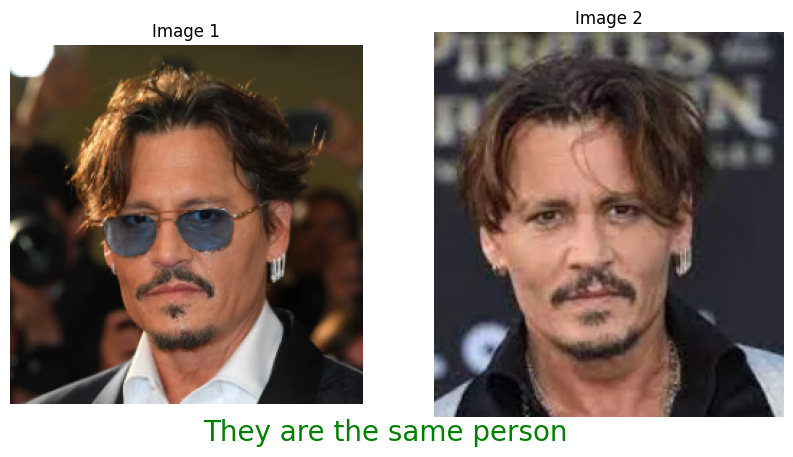

In [64]:
# Verify the faces
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the images
img1_path = f"{DATA_PATH}/{img1}"
img2_path = f"{DATA_PATH}/{img2}"

is_same_person, cos_similarity, euclidean_distance = face.verify_face(
                                                            img1_path=f"{DATA_PATH}/{img1}", 
                                                            img2_path=f"{DATA_PATH}/{img2}", 
                                                            epsilon=0.31
                                                            )
print(f"Same person: {is_same_person}")
print(f"Euclidean Distance: {euclidean_distance}")
print(f"Cosine Similarity: {cos_similarity}")
img1 = mpimg.imread(img1_path)
img2 = mpimg.imread(img2_path)

text_color = "g" if is_same_person else "r"
text = "They are the same person" if is_same_person else "They are not the same person"

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('Image 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Image 2')
plt.axis('off')

plt.figtext(0.5, 0.05, text, ha='center', va='bottom', fontsize=20, color=text_color)
plt.show()
